In [ ]:
# Dependencies
import tweepy
import json
import pandas as pd
import os

In [ ]:
# Get the current working directory
orig_working_directory = os.getcwd()
print(orig_working_directory)

In [ ]:
# In this case, we are changing it to six levels up
os.chdir(os.path.join('..','..','..','..','..','..'))

In [ ]:
# Now, you can see the new working directory
curr_working_directory = os.getcwd()
os.getcwd()

In [ ]:
# This will search for the config file in the working directory
# Be sure that your config file is in your root repo folder

from config import consumer_key, consumer_secret, access_token, access_token_secret

In [ ]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
# api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())
api = tweepy.API(auth)

In [ ]:
# Target User Account
user_account = "MayorBowser"

In [ ]:
tweets = []

tweet_id = []
created_at = []
favorite_count = []
full_text = []
entities = []

In [ ]:
# Iterate through the first 500 tweets
for tweet in tweepy.Cursor(api.user_timeline, 'MayorBowser', tweet_mode='extended').items(500):
    tweets.append(tweet)

In [ ]:
# Preview the tweets list
#tweets

In [ ]:
# Loop through Tweets list and process data 
for t in tweets:
    tweet_id.append(t.id)
    created_at.append(t.created_at)
    favorite_count.append(t.favorite_count)
    full_text.append(t.full_text)
    entities.append(t.entities)

In [ ]:
# Build a tweets DataFrame

tweets_df = pd.DataFrame({
    'Tweet ID': tweet_id,
    'Tweet Time': created_at,
    'Favorite Count': favorite_count,
    'Tweet Text': full_text    
    })

In [ ]:
len(tweets_df)

In [ ]:
# set DataFrame to not truncate
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

In [ ]:
tweets_df.head()

In [153]:
tweets_df

,Tweet ID,Tweet Time,Favorite Count,Tweet Text
0,1259151255097802753,2020-05-09 16:00:27,8,"There's hope to be had, and hope to be given. As you look for last minute Mother's Day gifts, consider supporting a local business. They need us, and we need them. #DCHOPE https://t.co/6pwMQbxSQ4"
1,1259121269095702528,2020-05-09 14:01:18,3,2/ The District reported seven additional COVID-19 related deaths:\n \n35-year-old male\n54-year-old male\n68-year-old male\n69-year-old male\n70-year-old male\n76-year-old male\n96-year-old female\n \n311 District residents have lost their lives due to COVID-19. https://t.co/yvVN6WfbuK
2,1259121266033917956,2020-05-09 14:01:17,15,"1/ The District’s reported data for Friday, May 8, 2020 includes 203 new positive coronavirus (COVID-19) cases, bringing the District’s overall positive case total to 6,102.\n \nLearn more: https://t.co/OptCmVsykG https://t.co/zndH1qaPW2"
3,1258935981006356487,2020-05-09 01:45:02,69,It's okay not to be okay. Just know we'll get through this together. Call us if you need someone to talk to: 1-888-793-4357. https://t.co/Skf7utgBbh
4,1258864869861883907,2020-05-08 21:02:28,84,How can we reopen DC in line with our #DCvalues? Share your comments and suggestions by filling out the following survey: https://t.co/m3uTibL1Bk
...,...,...,...,...
495,1242193840590794754,2020-03-23 20:57:45,53,"2/ The new supply of hand sanitizer will be allocated to the District’s frontline workers, including first responders, health workers, and critical government personnel leaving their homes every day to serve their neighbors."
496,1242193836014796806,2020-03-23 20:57:44,398,"1/ DC Government has commissioned 2,000 gallons of hand sanitizer from @RepublicRestore and @CompassCoffeeDC (1,000 each) as part of our response to the coronavirus (COVID-19). https://t.co/ell1A3zl7T"
497,1242184580876156928,2020-03-23 20:20:57,408,"In simple terms: be a good neighbor, stay at home. #StayHomeDC"
498,1242171131525808130,2020-03-23 19:27:30,17,"3/ The Office of Tax and Revenue (OTR) encourages taxpayers who are able to file their returns electronically to do so. For additional information, please contact OTR’s Customer Service Center at (202) 727-4TAX (4829).\n \nhttps://t.co/MEWs6uxEBa"


In [156]:
#tweets_df.to_excel('bowser_tweets.xlsx')
#entities

In [157]:
hashtag_entries = [e['hashtags'] for e in entities]
hashtag_entries

[[{'text': 'DCHOPE', 'indices': [164, 171]}],
 [],
 [],
 [],
 [{'text': 'DCvalues', 'indices': [38, 47]}],
 [{'text': 'FITDC', 'indices': [6, 12]},
  {'text': 'StayHomeDC', 'indices': [104, 115]}],
 [],
 [],
 [],
 [],
 [{'text': 'FITDC', 'indices': [6, 12]}],
 [{'text': 'DCHOPE', 'indices': [222, 229]}],
 [],
 [],
 [],
 [],
 [{'text': 'dcsmallbiz', 'indices': [25, 36]}],
 [{'text': 'FITDC', 'indices': [6, 12]}],
 [],
 [],
 [{'text': 'NationalNursesDay', 'indices': [44, 62]}],
 [{'text': 'FITDC', 'indices': [6, 12]},
  {'text': 'StayHomeDC', 'indices': [104, 115]}],
 [],
 [],
 [{'text': 'NationalNursesDay', 'indices': [252, 270]}],
 [],
 [],
 [],
 [],
 [{'text': 'FITDC', 'indices': [6, 12]}],
 [{'text': 'StayHomeDC', 'indices': [127, 138]}],
 [],
 [{'text': 'FITDC', 'indices': [6, 12]},
  {'text': 'StayHomeDC', 'indices': [104, 115]}],
 [],
 [{'text': 'ThankADCTeacher', 'indices': [256, 272]}],
 [],
 [],
 [],
 [{'text': 'FITDC', 'indices': [6, 12]}],
 [{'text': 'ThankADCTeacher', 'indic

In [165]:
hashtags = []

for h in hashtag_entries:
    for t in h:
        hashtags.append(t['text'])
        
hashtags

['DCHOPE',
 'DCvalues',
 'FITDC',
 'StayHomeDC',
 'FITDC',
 'DCHOPE',
 'dcsmallbiz',
 'FITDC',
 'NationalNursesDay',
 'FITDC',
 'StayHomeDC',
 'NationalNursesDay',
 'FITDC',
 'StayHomeDC',
 'FITDC',
 'StayHomeDC',
 'ThankADCTeacher',
 'FITDC',
 'ThankADCTeacher',
 'TeacherAppreciationWeek',
 'FITDC',
 'StayHomeDC',
 'FITDC',
 'TeachDC',
 'StayHomeDC',
 'StayHomeDC',
 'StayHomeDC',
 'StayHomeDC',
 'SaferStrongerDC',
 'StayHomeDC',
 'AAPIHM',
 'DCValues',
 'FITDC',
 'DayINDC',
 'DayINDC',
 'DayINDC',
 'DayINDC',
 'DayINDC',
 'DayINDC',
 'FITDC',
 'StayHomeDC',
 'StayHomeDC',
 'FITDC',
 'FITDC',
 'StayHomeDC',
 'StayHome',
 'RaisetheGame',
 'BeMonumental',
 'FITDC',
 'HomewardDC',
 'DCvalues',
 'FITDC',
 'DCvalues',
 'StayHomeDC',
 'FITDC',
 'StayHomeDC',
 'StayHomeDC',
 'StayHomeDC',
 'DCProud',
 'FITDC',
 'StayHomeDC',
 'FITDC',
 'StayHomeDC',
 'StayHomeDC',
 'StayHomeDC',
 'FITDC',
 'StayHomeDC',
 'FITDC',
 'KingLectureSeries',
 'Ramadan',
 'RamadanMubarak',
 'FITDC',
 'FITDC',
 'Earth

In [160]:
hashtag_entries

[[{'text': 'DCHOPE', 'indices': [164, 171]}],
 [],
 [],
 [],
 [{'text': 'DCvalues', 'indices': [38, 47]}],
 [{'text': 'FITDC', 'indices': [6, 12]},
  {'text': 'StayHomeDC', 'indices': [104, 115]}],
 [],
 [],
 [],
 [],
 [{'text': 'FITDC', 'indices': [6, 12]}],
 [{'text': 'DCHOPE', 'indices': [222, 229]}],
 [],
 [],
 [],
 [],
 [{'text': 'dcsmallbiz', 'indices': [25, 36]}],
 [{'text': 'FITDC', 'indices': [6, 12]}],
 [],
 [],
 [{'text': 'NationalNursesDay', 'indices': [44, 62]}],
 [{'text': 'FITDC', 'indices': [6, 12]},
  {'text': 'StayHomeDC', 'indices': [104, 115]}],
 [],
 [],
 [{'text': 'NationalNursesDay', 'indices': [252, 270]}],
 [],
 [],
 [],
 [],
 [{'text': 'FITDC', 'indices': [6, 12]}],
 [{'text': 'StayHomeDC', 'indices': [127, 138]}],
 [],
 [{'text': 'FITDC', 'indices': [6, 12]},
  {'text': 'StayHomeDC', 'indices': [104, 115]}],
 [],
 [{'text': 'ThankADCTeacher', 'indices': [256, 272]}],
 [],
 [],
 [],
 [{'text': 'FITDC', 'indices': [6, 12]}],
 [{'text': 'ThankADCTeacher', 'indic

In [166]:
hashtags_series = pd.Series(hashtags)

In [168]:
tweet_counts = hashtags_series.value_counts()
tweet_counts

StayHomeDC                 74
FITDC                      62
DayINDC                    6 
coronavirus                5 
DCproud                    4 
DCvalues                   4 
askMayorBowser             3 
WorldHealthDay             3 
QuedateEnCasaDC            2 
QuedeseEnCasaDC            2 
DCHOPE                     2 
ThankADCTeacher            2 
DCStatehood                2 
NationalNursesDay          2 
BeMonumental               1 
DCProud                    1 
NationalDoctorsDay         1 
AAPIHM                     1 
KingLectureSeries          1 
EarthDay2020               1 
StayHome                   1 
CensusDay                  1 
leadership                 1 
NoAAPIHate                 1 
RaisetheGame               1 
TeachDC                    1 
HomewardDC                 1 
RamadanMubarak             1 
DCValues                   1 
TeacherAppreciationWeek    1 
SaferStrongerDC            1 
Passover                   1 
Ramadan                    1 
FitDC     

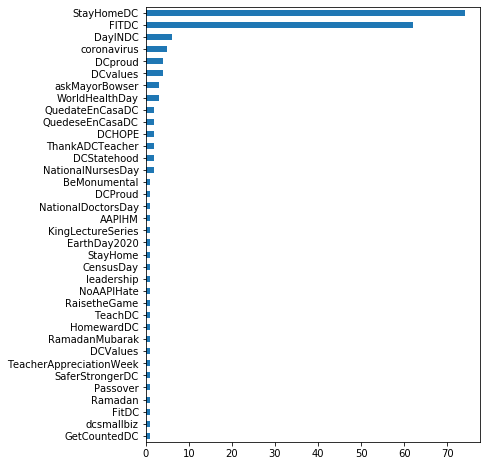

In [169]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(6, 8))

tweet_plot = tweet_counts.plot(kind='barh')
tweet_plot.invert_yaxis()

In [164]:
tweet_counts.sum()

195